# MODIS data dowloading and processing

## Required python libraries

glob, requests, gdal (gdal installation: brew install gdal, which does not include hdf4 driver)


## Building hdf4 driver on mac

1. get hdf-4.2.10.tar.gz (https://support.hdfgroup.org/ftp/HDF/releases/HDF4.2.10/src/hdf-4.2.10.tar.gz)
2. unzip hdf-4.2.10.tar.gz and go into the directory
3. cd hdf-4.2.10 && ./configure --disable-fortran --enable-production --enable-shared --disable-netcdf --with-zlib=/usr --with-jpeg=/usr/local --prefix=/usr/local/hdf4
4. make >& make.out
5. make check >& check.out
6. make install


## Building pyhdf4 wrapper on mac

1. export INCLUDE_DIRS=/usr/local/hdf4/include (make sure consist with the hdf configuration)
2. export LIBRARY_DIRS=/usr/local/hdf4/lib (make sure consist with the hdf configuration)
3. pip3 install pyhdf


## Utility file - maskmodis.py

The file was modified from pymasker (hdf4 file was read by pyhdf4) and the copyright should belong to the original authors. Specific procedure of QA masking, please read https://stevemosher.wordpress.com/2012/12/05/modis-qc-bits/


## Utility file - downmodis.py

The file was modified from pyModis.downmodis and the copyright should belong to the original authors

In [1]:
from pyhdf.SD import SD, SDC
from utils import parsemodis
from utils.maskmodis import ModisQuality, Masker
from utils import downmodis
import glob

GDAL installation has no support for HDF4, please use pyhdf for processing


In [2]:
# Variables for data download
dest = "test/" # This directory must already exist BTW
tiles = "h11v04" # That's the MODIS tile covering northern Europe
day = "2017.06.01"
enddate = "2017.06.20" # The download works backward, so that enddate is anterior to day=
product = "MOD11A2.006"

In [3]:
# Instantiate download class, connect and download
modis_down = downmodis.downModis(destinationFolder=dest, tiles=tiles, today=day, enddate=enddate, product=product)
modis_down.connect()
modis_down.downloadsAllDay()

test/MOD11A2.A2017169.h11v04.006.2017178120933.hdf.xml does not exist in the directory, start downloading ...
test/MOD11A2.A2017169.h11v04.006.2017178120933.hdf does not exist in the directory, start downloading ...
test/MOD11A2.A2017161.h11v04.006.2017172160707.hdf does not exist in the directory, start downloading ...
test/MOD11A2.A2017161.h11v04.006.2017172160707.hdf.xml does not exist in the directory, start downloading ...
test/MOD11A2.A2017153.h11v04.006.2017163190437.hdf does not exist in the directory, start downloading ...
test/MOD11A2.A2017153.h11v04.006.2017163190437.hdf.xml does not exist in the directory, start downloading ...


In [3]:
# Check that the data has been downloaded
MODIS_files = glob.glob(dest + '*.hdf')
print(MODIS_files)

['test/MOD11A2.A2017153.h11v04.006.2017163190437.hdf', 'test/MOD11A2.A2017169.h11v04.006.2017178120933.hdf', 'test/MOD11A2.A2017161.h11v04.006.2017172160707.hdf']


In [8]:
# parse modis by geospatial points
from utils import geoParseModis
from numpy import random

# create object
modisLST = geoParseModis.getModisLST_1km(MODIS_file=MODIS_files[0], prefix='Day')

# generate some random test points based on bounds
bounds = modisLST.getBound()
print(bounds)
rand_size = 40

bounds = modisLST.getBound()
longs = random.randint(bounds['min_lon'], bounds['max_lon'], rand_size) + random.sample(rand_size)
lats = random.randint(bounds['min_lat'], bounds['max_lat'], rand_size) + random.sample(rand_size)
zval = random.randint(0, 100, rand_size)
print(list(zip(longs, lats, zval)))

{'min_lat': 40.0041666666667, 'max_lat': 49.9958333333333, 'min_lon': -108.907135955788, 'max_lon': -78.339447774053}
[(-100.21619112107406, 44.753370622761004, 80), (-79.25554388934552, 46.23910333084723, 46), (-105.73552979917099, 40.26676113062164, 32), (-90.19962487674447, 43.35703864986174, 53), (-83.44012446984038, 44.074095850118255, 74), (-101.15556868471032, 46.74180714237705, 26), (-91.59418417576006, 42.07513281584263, 48), (-79.0245839901459, 44.36997561740779, 59), (-105.69768588879721, 44.106178910378546, 89), (-79.04007335955515, 42.181427437290594, 20), (-92.73550375793413, 48.26852238069109, 35), (-102.0168811741526, 44.17285717879307, 9), (-91.51552125595978, 44.331623004458834, 65), (-90.01634963746787, 41.19874628781972, 35), (-87.79414497726344, 43.554384551317256, 24), (-80.69931068463806, 46.080352688712665, 62), (-87.40863152221175, 43.471083305963475, 23), (-98.44770894324664, 46.81143290748017, 98), (-103.06294781520668, 42.51766080769735, 66), (-91.8681648690

There are 0 has been excluded due to laying out boundary
There are 0 has been excluded due to laying out boundary


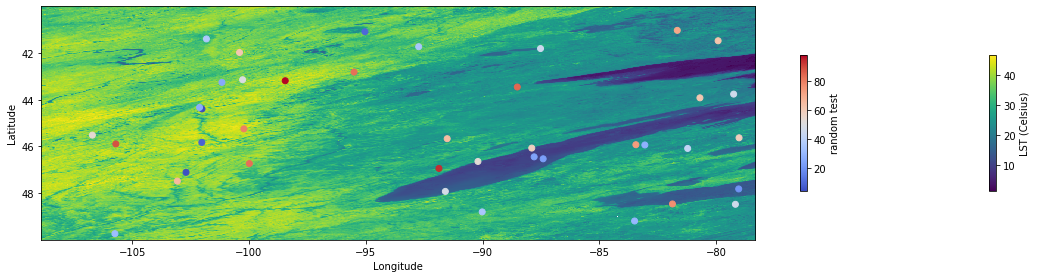

None


In [9]:
# create object
modisLST = geoParseModis.getModisLST_1km(MODIS_file=MODIS_files[0], prefix='Day', lats=lats, longs=longs)
modisLST.plotOverlap(zval=zval, z_label='random test')